In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import pandas as pd
from scipy import stats
import statsmodels.api as sm

C:\Users\alvar\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\alvar\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## File Input and Data Preparation

In [2]:
#Converts my data into a Pandas dataframe
excel_file = "Cam_Pop.xlsx"
Cam_Pop = pd.read_excel(excel_file)
Cam_Pop.head()

,Year,Population
0,1970,140368.0
1,1971,147800.0
2,1972,157500.0
3,1973,166900.0
4,1974,172200.0


In [3]:
Cam_Pop.tail()

,Year,Population
76,2046,NaN
77,2047,NaN
78,2048,NaN
79,2049,NaN
80,2050,NaN


In [4]:
Cam_Pop['Population Model'] = np.zeros # adding a new column for Population Model
Cam_Pop.head()

,Year,Population,Population Model
0,1970,140368.0,<built-in function zeros>
1,1971,147800.0,<built-in function zeros>
2,1972,157500.0,<built-in function zeros>
3,1973,166900.0,<built-in function zeros>
4,1974,172200.0,<built-in function zeros>


## Variable Defining and Linear Regression

In [5]:
Cam_Popall = Cam_Pop[0:49] #This extracts values with the 48 year period of 1970 to 2018
Population = Cam_Popall['Population'] # Some variable defining to make it easier later on
Year = Cam_Popall['Year']
time = Year - Year[0]

Text(0.5, 0, 'Year')

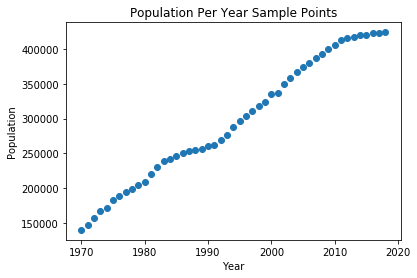

In [6]:
fig, ax = plt.subplots() # This is a plot of my population for each year that I have data for
ax.scatter(Year, Population)
ax.set_title('Population Per Year Sample Points')
ax.set_ylabel('Population')
ax.set_xlabel('Year')

In [7]:
# sets variable for ln(nt/No) vs t
df = np.log(Population/Population[0])
df.tail(n=10)

39    1.047954
40    1.062627
41    1.079884
42    1.086653
43    1.090508
44    1.094717
45    1.096125
46    1.101062
47    1.103532
48    1.105249
Name: Population, dtype: float64

In [8]:
# Fitting a line using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(time, df)

In [9]:
slope, intercept, r_value, p_value, std_err

(0.02217467671587426,
 0.16628725518379495,
 0.9851148511274568,
 1.3411803631050339e-37,
 0.0005644050775983078)

Text(0, 0.5, 'Ln(N(t)/No)')

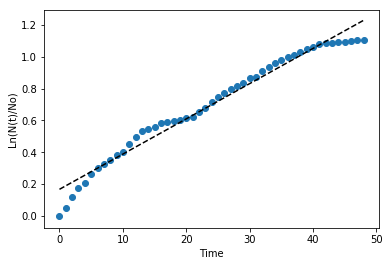

In [10]:
plt.scatter(time,df) # This a plot of the line of best fit for my ln(nt/no) values
plt.plot(time, slope*time+intercept,'k--')
plt.xlabel('Time')
plt.ylabel('Ln(N(t)/No)')

### Using Statsmodels(both methods work)

In [11]:
# I like Statsmodels better for my workflow :)
X = time
Y = df
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2746.
Date:                Sun, 05 May 2019   Prob (F-statistic):           5.03e-44
Time:                        23:34:01   Log-Likelihood:                 43.004
No. Observations:                  49   AIC:                            -84.01
Df Residuals:                      48   BIC:                            -82.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0273      0.001     52.406      0.000       0.026       0.028
==============================================================================
Omnibus:                        7.473   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.714
Skew:                          -0.884   Prob(JB):                       0.0348
Kurtosis:                       3.402   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Ln Nt/No')

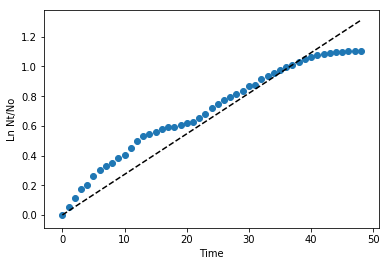

In [12]:
predictions = model.predict(X) # make the predictions by the model
plt.plot(X, predictions, 'k--')
plt.scatter(time, df)
plt.xlabel('Time')
plt.ylabel('Ln Nt/No')

## Population Modeling

In [13]:
# Now I use my model to predict a new time period for the future :)
Year_o = Cam_Pop['Year']
time_o = Year_o - Year_o[0]
f_predictions = model.predict(time_o)
Cam_Pop['Population Model'] = np.exp(f_predictions)*140368

In [14]:
Cam_Pop.head()# SUCCESS I UNDERSTAND THE BASICS OF MODELING!!!

,Year,Population,Population Model
0,1970,140368.0,140368.000000
1,1971,147800.0,144255.369303
2,1972,157500.0,148250.395908
3,1973,166900.0,152356.061289
4,1974,172200.0,156575.429491


In [15]:
Cam_Pop.tail() # Population Model for 48 Year Period

,Year,Population,Population Model
76,2046,NaN,1.119238e+06
77,2047,NaN,1.150235e+06
78,2048,NaN,1.182089e+06
79,2049,NaN,1.214826e+06
80,2050,NaN,1.248470e+06


Text(0.5, 0, 'Year')

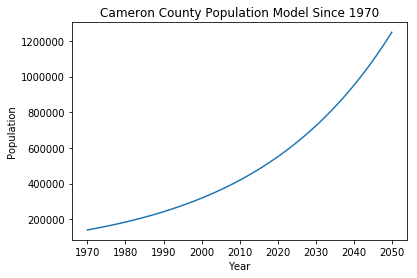

In [16]:
fig, ax = plt.subplots() #plots the predicted values from 1970 to 2050
plt.plot(Cam_Pop['Year'], Cam_Pop['Population Model'])
ax.set_title('Cameron County Population Model Since 1970')
ax.set_ylabel('Population')
ax.set_xlabel('Year')

### Now with a 10 year period (2008-2018)

In [17]:
Cam_Pop10 = Cam_Pop[38:49] #Extract values from 2008 to 2018
Cam_Pop10['Population Model'] = np.zeros
Cam_Pop10.head(n=11)

C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Population,Population Model
38,2008,393000.0,<built-in function zeros>
39,2009,400303.0,<built-in function zeros>
40,2010,406220.0,<built-in function zeros>
41,2011,413291.0,<built-in function zeros>
42,2012,416098.0,<built-in function zeros>
43,2013,417705.0,<built-in function zeros>
44,2014,419467.0,<built-in function zeros>
45,2015,420058.0,<built-in function zeros>
46,2016,422137.0,<built-in function zeros>
47,2017,423181.0,<built-in function zeros>


Text(0.5, 0, 'Year')

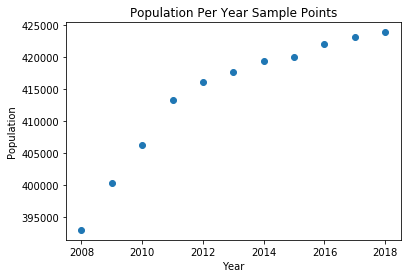

In [18]:
Population10 = Cam_Pop10['Population'] #Whole new set of variables and a plot of my sample points per year
Year10 = Cam_Pop10['Year']
time10 = Year10 - Year10[38]
fig, ax = plt.subplots()
ax.scatter(Year10, Population10)
ax.set_title('Population Per Year Sample Points')
ax.set_ylabel('Population')
ax.set_xlabel('Year')

In [19]:
# set variable for ln(nt/No) vs t
df10 = np.log(Population10/Population10[38])
X10 = time10
Y10 = df10
model10 = sm.OLS(Y10,X10).fit() #new modelfor 10 year period
model10.summary()

C:\Users\alvar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 05 May 2019   Prob (F-statistic):           1.01e-07
Time:                        23:34:02   Log-Likelihood:                 32.073
No. Observations:                  11   AIC:                            -62.15
Df Residuals:                      10   BIC:                            -61.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0094      0.001     13.425      0.000       0.008       0.011
==============================================================================
Omnibus:                        0.656   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.627
Skew:                          -0.411   Prob(JB):                        0.731
Kurtosis:                       2.168   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Ln(N(t)/No)')

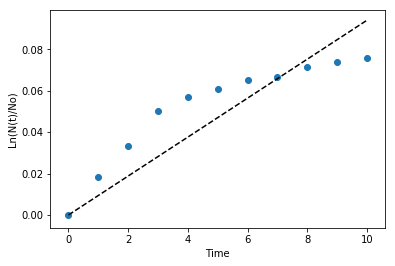

In [20]:
predictions10 = model10.predict(X10) # make the predictions by the new 10 year model
plt.plot(X10, predictions10, 'k--')
plt.scatter(time10, df10)
plt.xlabel('Time')
plt.ylabel('Ln(N(t)/No)')

In [21]:
Cam_Pop2 = Cam_Pop[38:80] #include NaN values and corresponding years so that model can populate them...no pun intended
Year_m10 = Cam_Pop2['Year']
time_m10 = Year_m10 - Year_m10[38]
t_predictions = model10.predict(time_m10) # predict for the full time period now
Cam_Pop2['Population Model'] = np.exp(t_predictions)*Population10[38]
Cam_Pop2.tail()

C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Year,Population,Population Model
75,2045,NaN,556583.575146
76,2046,NaN,561843.282169
77,2047,NaN,567152.693349
78,2048,NaN,572512.278391
79,2049,NaN,577922.511437


In [22]:
Cam_Pop2.head()

,Year,Population,Population Model
38,2008,393000.0,393000.000000
39,2009,400303.0,396713.844519
40,2010,406220.0,400462.784816
41,2011,413291.0,404247.152548
42,2012,416098.0,408067.282501


Text(0.5, 0, 'Year')

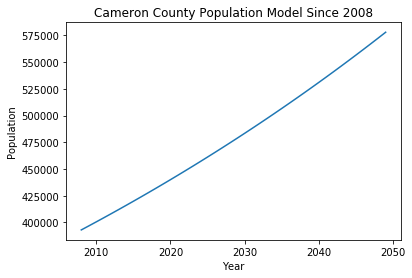

In [23]:
fig, ax = plt.subplots()
plt.plot(Cam_Pop2['Year'], Cam_Pop2['Population Model'])
ax.set_title('Cameron County Population Model Since 2008')
ax.set_ylabel('Population')
ax.set_xlabel('Year')
# 10 Year model has way more linear predictions and predicts around 420,000 less people for year 2050 than 48 year model!!!

### Now with a 25 year period (1993-2018)

In [24]:
Cam_Pop25 = Cam_Pop[23:49]
Cam_Pop25['Population Model'] = np.zeros
Cam_Pop25.head(n=26)# get my 25 year period only

C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Population,Population Model
23,1993,277166.0,<built-in function zeros>
24,1994,287950.0,<built-in function zeros>
25,1995,296948.0,<built-in function zeros>
26,1996,304459.0,<built-in function zeros>
27,1997,311522.0,<built-in function zeros>
28,1998,317719.0,<built-in function zeros>
29,1999,324046.0,<built-in function zeros>
30,2000,334884.0,<built-in function zeros>
31,2001,336123.0,<built-in function zeros>
32,2002,350194.0,<built-in function zeros>


Text(0.5, 0, 'Year')

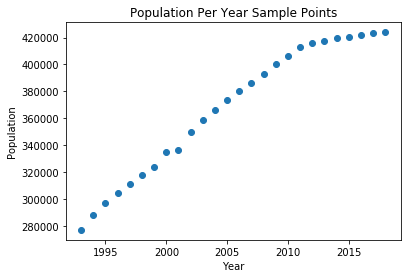

In [25]:
Population25 = Cam_Pop25['Population'] #Whole new set of variables and a plot of my sample points per year
Year25 = Cam_Pop25['Year']
time25 = Year25 - Year25[23]
fig, ax = plt.subplots()
ax.scatter(Year25, Population25)
ax.set_title('Population Per Year Sample Points')
ax.set_ylabel('Population')
ax.set_xlabel('Year')

In [26]:
# set variable for ln(nt/No) vs t
df25 = np.log(Population25/Population25[23])
X25 = time25
Y25 = df25
model25 = sm.OLS(Y25,X25).fit() #new model for 25 year period
model25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1301.
Date:                Sun, 05 May 2019   Prob (F-statistic):           4.41e-23
Time:                        23:34:03   Log-Likelihood:                 45.601
No. Observations:                  26   AIC:                            -89.20
Df Residuals:                      25   BIC:                            -87.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0207      0.001     36.071      0.000       0.020       0.022
==============================================================================
Omnibus:                       11.481   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.168
Skew:                          -1.446   Prob(JB):                      0.00619
Kurtosis:                       4.011   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Ln(N(t)/No)')

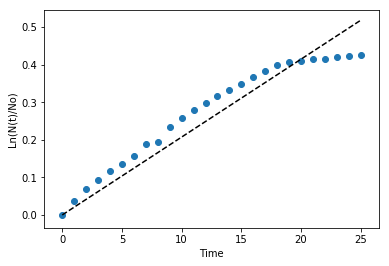

In [27]:
predictions25 = model25.predict(X25) # make the predictions by the new 10 year model
plt.plot(X25, predictions25, 'k--')
plt.scatter(time25, df25)
plt.xlabel('Time')
plt.ylabel('Ln(N(t)/No)')

In [28]:
Cam_Pop3 = Cam_Pop[23:80] #include NaN values and corresponding years again
Year_m25 = Cam_Pop3['Year']
time_m25 = Year_m25 - Year_m25[23]
tf_predictions = model25.predict(time_m25) # predict for the full time period now
Cam_Pop3['Population Model'] = np.exp(tf_predictions)*Population25[23]
Cam_Pop3.tail()

C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Year,Population,Population Model
75,2045,NaN,814462.925805
76,2046,NaN,831522.195874
77,2047,NaN,848938.779562
78,2048,NaN,866720.160953
79,2049,NaN,884873.980890


In [29]:
Cam_Pop3.head()

,Year,Population,Population Model
23,1993,277166.0,277166.000000
24,1994,287950.0,282971.358965
25,1995,296948.0,288898.313626
26,1996,304459.0,294949.410857
27,1997,311522.0,301127.250875


Text(0.5, 0, 'Year')

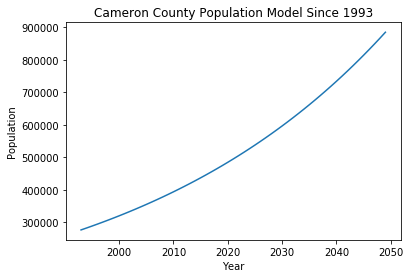

In [30]:
fig, ax = plt.subplots()
plt.plot(Cam_Pop3['Year'], Cam_Pop3['Population Model'])
ax.set_title('Cameron County Population Model Since 1993')
ax.set_ylabel('Population')
ax.set_xlabel('Year')

### Now to compare the 10 year, 25 year, and 48 year models

In [31]:
Cam_Popf = Cam_Pop[50:81]
del Cam_Popf['Population']
del Cam_Popf['Population Model']
Cam_Popf['Population Model 48 Year'] = np.zeros
Cam_Popf['Population Model 25 Year'] = np.zeros
Cam_Popf['Population Model 10 Year'] = np.zeros
Cam_Popf.head(n=5)

C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,Year,Population Model 48 Year,Population Model 25 Year,Population Model 10 Year
50,2020,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
51,2021,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
52,2022,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
53,2023,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
54,2024,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>


In [32]:
Model_10 = Cam_Pop2['Population Model']
Model_25 = Cam_Pop3['Population Model']
Model_48 = Cam_Pop['Population Model']

In [33]:
Cam_Popf['Population Model 48 Year'] = Model_48
Cam_Popf['Population Model 25 Year'] = Model_25
Cam_Popf['Population Model 10 Year'] = Model_10
Cam_Popf.head()

C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,Year,Population Model 48 Year,Population Model 25 Year,Population Model 10 Year
50,2020,550125.602950,485074.185848,439956.994763
51,2021,565360.851595,495234.269601,444114.582227
52,2022,581018.027160,505607.160601,448311.458835
53,2023,597108.814544,516197.316185,452547.995868
54,2024,613645.222246,527009.287052,456824.568117


In [34]:
Year_f = Cam_Popf['Year']
M48 = Cam_Popf['Population Model 48 Year']
M25 = Cam_Popf['Population Model 25 Year']
M10 = Cam_Popf['Population Model 10 Year']

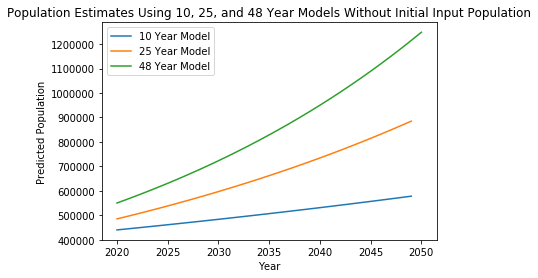

In [35]:
fig, ax = plt.subplots()
plt.plot(Year_f, M10, label='10 Year Model')
plt.plot(Year_f, M25, label='25 Year Model')
plt.plot(Year_f, M48, label='48 Year Model')
ax.set_ylabel('Predicted Population')
ax.set_xlabel('Year')
ax.set_title('Population Estimates Using 10, 25, and 48 Year Models Without Initial Input Population')
plt.legend()
plt.show()
# These estimates are not in consideration of our initial starting population for 2018

### Now with the consideration of 2018 Population

In [36]:
Cam_Popf2 = Cam_Pop[48:80]
del Cam_Popf2['Population Model']
Cam_Popf2['Population Model 48 Year'] = np.zeros
Cam_Popf2['Population Model 25 Year'] = np.zeros
Cam_Popf2['Population Model 10 Year'] = np.zeros
Cam_Popf2.head()

C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,Year,Population,Population Model 48 Year,Population Model 25 Year,Population Model 10 Year
48,2018,423908.0,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
49,2019,NaN,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
50,2020,NaN,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
51,2021,NaN,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
52,2022,NaN,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>


In [37]:
f_Year = Cam_Popf2['Year'] #Using the 3 models to predict from 2018 forward
t_final = f_Year - f_Year[48]
Initial_Pop = Cam_Popf2['Population']
final_10 = model10.predict(t_final)
final_25 = model25.predict(t_final)
final_48 = model.predict(t_final)

In [38]:
Mf_48 = Cam_Popf2['Population Model 48 Year'] #variable for easier plotting
Mf_25 = Cam_Popf2['Population Model 25 Year']
Mf_10 = Cam_Popf2['Population Model 10 Year']

In [39]:
Mf_10 = np.exp(final_10)*Initial_Pop[48] #filling the columns out and transforming back from natural log
Mf_25 = np.exp(final_25)*Initial_Pop[48]
Mf_48 = np.exp(final_48)*Initial_Pop[48]
Cam_Popf2.head()

,Year,Population,Population Model 48 Year,Population Model 25 Year,Population Model 10 Year
48,2018,423908.0,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
49,2019,NaN,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
50,2020,NaN,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
51,2021,NaN,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>
52,2022,NaN,<built-in function zeros>,<built-in function zeros>,<built-in function zeros>


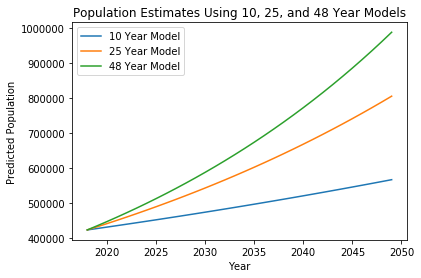

In [40]:
fig, ax = plt.subplots()
plt.plot(f_Year, Mf_10, label = '10 Year Model' )
plt.plot(f_Year, Mf_25, label = '25 Year Model')
plt.plot(f_Year, Mf_48, label = '48 Year Model')
plt.legend()
ax.set_ylabel('Predicted Population')
ax.set_xlabel('Year')
ax.set_title('Population Estimates Using 10, 25, and 48 Year Models')
plt.show()

### Linear models instead of natural log models

In [41]:
TP = Cam_Pop['Year']# Creating Time Periods & Population Variables
Pop_all = Cam_Pop['Population']
T48 = TP[0:49]
Time_L48 = T48 - TP[0]
T25 = TP[23:49]
Time_L25 = T25 - TP[23]
T10 = TP[38:49]
Time_L10 = T10 - TP[38]
Pop48 = Pop_all[0:49] - Pop_all[0]
Pop25 = Pop_all[23:49] - Pop_all[23]
Pop10 = Pop_all[38:49] - Pop_all[38]
T18 = TP[48:80]
Time_Final = T18 - TP[48]

In [42]:
Pop10, Time_L10

(38        0.0
 39     7303.0
 40    13220.0
 41    20291.0
 42    23098.0
 43    24705.0
 44    26467.0
 45    27058.0
 46    29137.0
 47    30181.0
 48    30908.0
 Name: Population, dtype: float64, 38     0
 39     1
 40     2
 41     3
 42     4
 43     5
 44     6
 45     7
 46     8
 47     9
 48    10
 Name: Year, dtype: int64)

In [43]:
L_model10 = sm.OLS(Pop10,Time_L10).fit() #This creates the models
L_model25 = sm.OLS(Pop25,Time_L25).fit()
L_model48 = sm.OLS(Pop48,Time_L48).fit()

In [44]:
predictions_L10 = L_model10.predict(Time_Final) # This makes predictions for pop add using the models for 2018-2050
predictions_L25 = L_model25.predict(Time_Final)
predictions_L48 = L_model48.predict(Time_Final)

In [45]:
Population_L10 = predictions_L10 + Pop_all[48] # This adds the initial 2018 Population to the increases
Population_L25 = predictions_L25 + Pop_all[48]
Population_L48 = predictions_L48 + Pop_all[48]

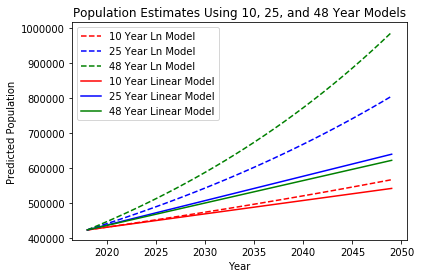

In [46]:
fig, ax = plt.subplots()
plt.plot(f_Year, Mf_10, label = '10 Year Ln Model', color = "red", linestyle = '--')
plt.plot(f_Year, Mf_25, label = '25 Year Ln Model', color = 'blue', linestyle = '--')
plt.plot(f_Year, Mf_48, label = '48 Year Ln Model', color = 'green', linestyle = '--')
plt.plot(f_Year, Population_L10, label = '10 Year Linear Model', color = 'red')
plt.plot(f_Year, Population_L25, label = '25 Year Linear Model', color = 'blue')
plt.plot(f_Year, Population_L48, label = '48 Year Linear Model', color = 'green')
plt.legend()
ax.set_ylabel('Predicted Population')
ax.set_xlabel('Year')
ax.set_title('Population Estimates Using 10, 25, and 48 Year Models')
plt.show()

In [47]:
Pop_ff = Pop_all[0:49]
Year_ff = TP[0:49]

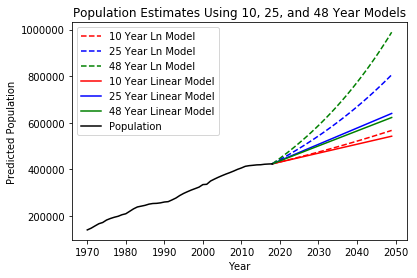

In [48]:
# Now to see the full picture!!!
fig, ax = plt.subplots()
plt.plot(f_Year, Mf_10, label = '10 Year Ln Model', color = "red", linestyle = '--')
plt.plot(f_Year, Mf_25, label = '25 Year Ln Model', color = 'blue', linestyle = '--')
plt.plot(f_Year, Mf_48, label = '48 Year Ln Model', color = 'green', linestyle = '--')
plt.plot(f_Year, Population_L10, label = '10 Year Linear Model', color = 'red')
plt.plot(f_Year, Population_L25, label = '25 Year Linear Model', color = 'blue')
plt.plot(f_Year, Population_L48, label = '48 Year Linear Model', color = 'green')
plt.plot(Year_ff, Pop_ff, label = 'Population', color = 'black')
plt.legend()
ax.set_ylabel('Predicted Population')
ax.set_xlabel('Year')
ax.set_title('Population Estimates Using 10, 25, and 48 Year Models')
plt.show()